# Week 8 Assignment – High Frequency Words

Henry Vasquez, Sergio Ortega

## 1. Choose a corpus of interest

For this assignment we'll be looking at Moby Dick by Herman Melville. We'll be using the NLTK to download the corpus.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import nltk
#nltk.download()
import nltk.corpus
from nltk.corpus import gutenberg as gt
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#other corpora included
print(gt.fileids())

['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']


In [3]:
#gather words from the corpus
moby = gt.words("melville-moby_dick.txt")
print(moby)

['[', 'Moby', 'Dick', 'by', 'Herman', 'Melville', ...]


In [4]:
#include only words and not other characters
moby_words = [words for words in moby if words.isalpha()]

#turn all words to lowercase
moby_words = [words.lower() for words in moby_words]

#remove stop words - gives us a better word list to work with
moby_words = [words for words in moby_words if words not in stopwords.words('english')]

#total words
len(moby_words)

110459

After changing the words from our corpus to lower case, including only alpha characters and removing any english stop words, we're left with 110k words in our corpus. We can change the list into a set to only have the unique words and continue our analysis of the corpus.

## 2. How many total unique words are in the corpus? (Please feel free to define unique words in any interesting, defensible way).

In [5]:
print(len(set(moby_words)))

16802


There is roughly under 17k unique words in our corpus, not including stop words.

## 3. Taking the most common words, how many unique words represent half of the total words in the corpus?

In [6]:
# code to get frequency of each word turn to datafram
words_frequency = pd.DataFrame(list(dict(nltk.FreqDist(moby_words)).items()), columns = ['Word', 'Count'])


# code to order by frequency
words_frequency = words_frequency.sort_values(by = 'Count', ascending=False).reset_index(drop=True)

# code to pull words that represent 55,230 words
word_count = 0
half_words_corpus = []
row=0
while word_count < 55229:
    #add current word to list
    half_words_corpus.append(words_frequency.iloc[row][0])
    
    #update current word count
    word_count += words_frequency.iloc[row][1]
    # move to next word
    row += 1
    
len(half_words_corpus)

687

In [7]:
half_words_corpus

['whale',
 'one',
 'like',
 'upon',
 'man',
 'ship',
 'ahab',
 'ye',
 'sea',
 'old',
 'would',
 'though',
 'yet',
 'head',
 'boat',
 'time',
 'long',
 'captain',
 'still',
 'great',
 'said',
 'two',
 'must',
 'seemed',
 'white',
 'last',
 'see',
 'thou',
 'way',
 'whales',
 'stubb',
 'queequeg',
 'little',
 'round',
 'three',
 'men',
 'say',
 'sperm',
 'may',
 'first',
 'every',
 'well',
 'us',
 'much',
 'could',
 'good',
 'hand',
 'side',
 'ever',
 'never',
 'look',
 'starbuck',
 'deck',
 'almost',
 'go',
 'even',
 'water',
 'thing',
 'away',
 'might',
 'come',
 'made',
 'day',
 'world',
 'sir',
 'life',
 'pequod',
 'chapter',
 'fish',
 'among',
 'many',
 'far',
 'seen',
 'back',
 'line',
 'let',
 'eyes',
 'oh',
 'without',
 'cried',
 'aye',
 'god',
 'know',
 'sort',
 'right',
 'thought',
 'night',
 'part',
 'boats',
 'air',
 'crew',
 'take',
 'whole',
 'half',
 'tell',
 'thus',
 'things',
 'whaling',
 'thee',
 'came',
 'soon',
 'hands',
 'mast',
 'small',
 'feet',
 'full',
 'somethin

687 non-stop words represent at least half of the words in our corpus. The list of words is above, 'whale' being the most common.

## 4. Identify the 200 highest frequency words in this corpus

In [8]:
#go back to 3 and create a list or table with frequency
words_frequency_top200 = words_frequency.head(200)
words_frequency_top200

,Word,Count
0,whale,1226
1,one,921
2,like,647
3,upon,566
4,man,527
...,...,...
195,instant,77
196,least,76
197,bed,76
198,fire,76


## 5. Create a graph that shows the relative frequency of these 200 words

<Figure size 2880x7200 with 0 Axes>

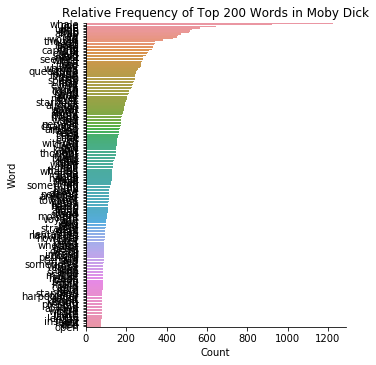

In [9]:
#create a chart from 4
plt.figure(figsize=(40,100))
sns.catplot(y='Word', 
            x='Count', 
            kind='bar', 
            data=words_frequency_top200).set(title='Relative Frequency of Top 200 Words in Moby Dick')

## 6. Does the observed relative frequency of these words follow Zipf’s law? Explain.

Zipf's law states that the frequency of a word is inversely proportional to its statistical rank. If we look at the relative frequency for the top 200 words in Moby Dick the chart follows what a Zipf's curve would look like. We can also look at a log rank vs log frequency chart, in which we should see an inverse relationship, thus proving Zipf's law.

[Text(0.5, 1.0, "Zipf's Law - Moby Dick")]

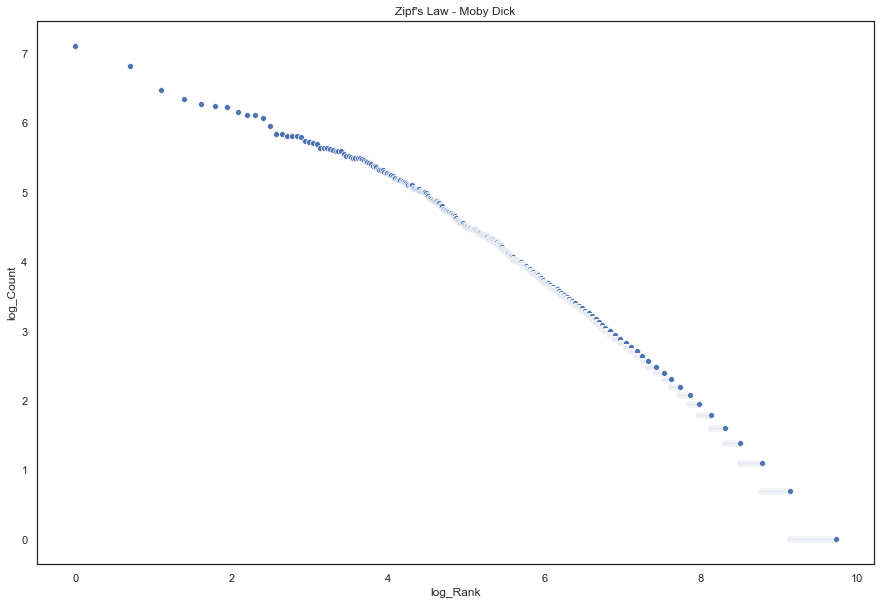

In [10]:
#add rank column
words_frequency.insert(loc=2, column='Rank', value=(np.arange(len(words_frequency))+1))

words_frequency['log_Count'] = np.log(words_frequency['Count'])
words_frequency['log_Rank'] = np.log(words_frequency['Rank'])

#graph
plt.figure(figsize=(15,10))
sns.set(font_scale=1)
sns.set_style("white")
sns.scatterplot(y='log_Count', x='log_Rank', data=words_frequency).set(title="Zipf's Law - Moby Dick")

The chart appears to follow the linear relationship that would be expected for a corpus that follows Zipf's law. It is also important to note that stop words were removed from this corpus, which could have an effect on the overal shape of our graphs.

## 7. In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora."

The word "whale" probably wouldn't be the top word. In general, some of the words that appear more frequent in this corpus are due to the story line, a story about the sea and a giant whale, and probably wouldn't appear as frequent if we looked at all corpora. The frequency of all words in all corpora might have most of its high ranking words mostly composed of stop words as opposed to this set which had the stop words removed. We'd also expect a straighter linear relationship when looking at the log rank vs log count chart and our relative frequency chart would more closely follow Zipf's law. 